Part III Practice
Use 3 methods - EM, VI, and MCMC to solve the GMM clustering problem

In [1]:
#imports and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv("df.csv")
display(data)

,V1,V2
0,13.98,8.71
1,10.85,9.43
2,10.35,8.68
3,12.77,12.14
4,25.26,12.88
...,...,...
235,7.58,7.05
236,21.33,13.12
237,22.23,11.83
238,7.28,7.47


C:\Users\imani\miniconda3\envs\my_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


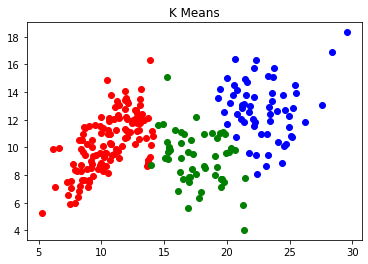

In [3]:
#k-means
k = 3
data_array = data.to_numpy()
#print(data_array)
kmeans=KMeans(n_clusters=k).fit(data_array)
#print(kmeans.cluster_centers_)
#print(kmeans.labels_)
label = kmeans.labels_
group_0 = data_array[label == 0]
group_1 = data_array[label == 1]
group_2 = data_array[label == 2]

plt.scatter(group_0[:,0], group_0[:,1], color="red")
plt.scatter(group_1[:,0], group_1[:,1], color="blue")
plt.scatter(group_2[:,0], group_2[:,1], color="green")
plt.title("K Means")
plt.show()

[[14.04338411 10.745421  ]
 [ 9.9617187  10.00034191]
 [21.39827847 11.41774797]]


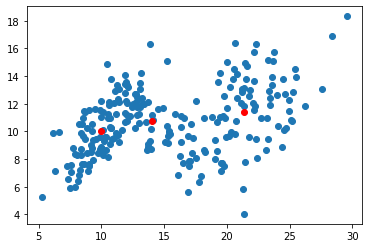

In [4]:
#EM
#sckikit learn version
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, init_params="random_from_data").fit(data_array)
print(gm.means_)
means = gm.means_
plt.scatter(data_array[:,0], data_array[:,1])
plt.scatter(means[:,0], means[:,1], color="red")
plt.show()


[[15.56835301  9.61484624]
 [21.82538902 12.01140213]
 [10.31133205 10.25562446]]


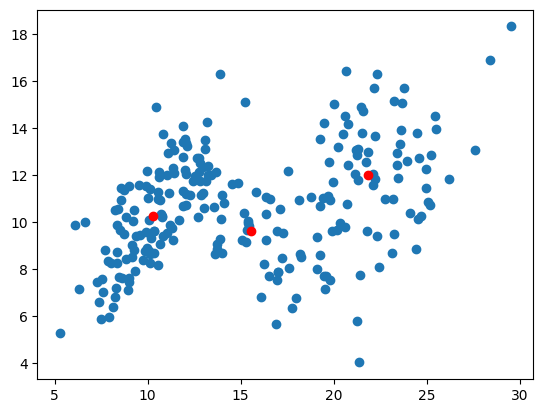

In [36]:
#VI
#scikit learn version
from sklearn.mixture import BayesianGaussianMixture
vi = BayesianGaussianMixture(n_components=3, init_params="random_from_data").fit(data_array)
print(vi.means_)
means = vi.means_
plt.scatter(data_array[:,0], data_array[:,1])
plt.scatter(means[:,0], means[:,1], color="red")
plt.show()


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta, data]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


array([<AxesSubplot: title={'center': 'theta'}>,
       <AxesSubplot: title={'center': 'data\n0'}>,
       <AxesSubplot: title={'center': 'data\n1'}>,
       <AxesSubplot: title={'center': 'data\n2'}>], dtype=object)

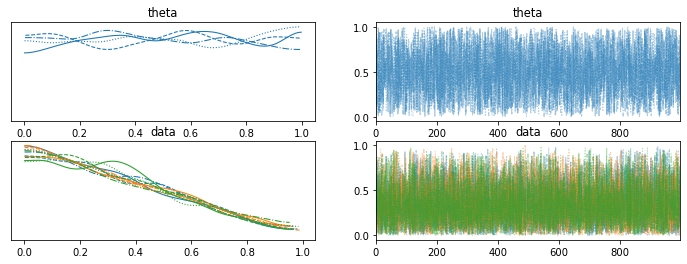

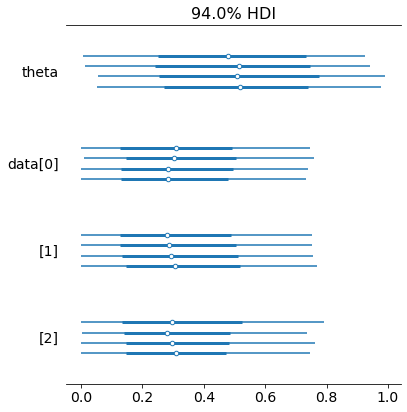

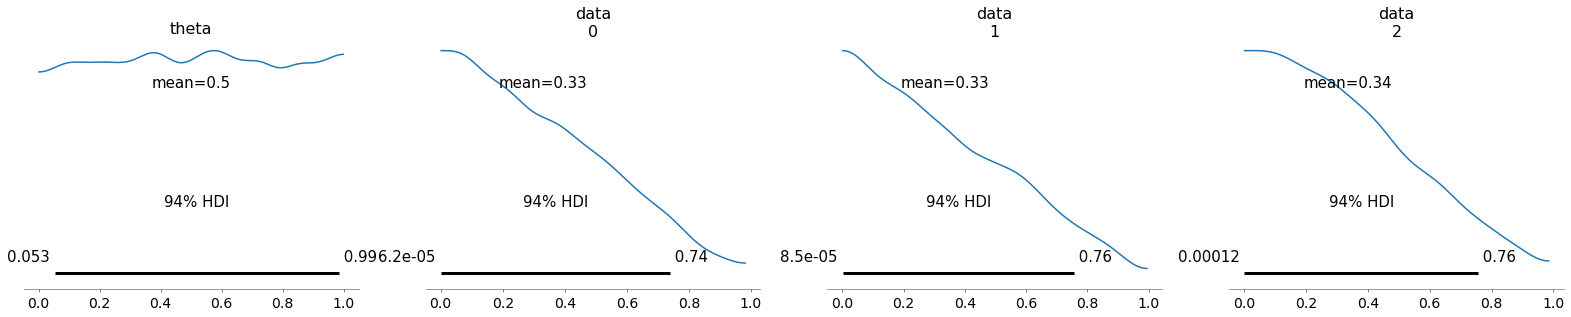

In [20]:
#MCMC

import pymc as pm
import arviz as az

model = pm.Model()

with model:
    #prior
    theta = pm.Uniform('theta', 0, 1)
    #pi = pm.Uniform("pi", 0, 1)
    #mu = pm.Cauchy("mu", 0, 1)
    #sigma = pm.Gamma("sigma", 0, 1)
    #p = pm.Mixture("p", )
    
    #likelihood
    dat = pm.Dirichlet("data", a=np.ones(3))
    
    #samples
    idata = pm.sample(return_inferencedata=True)
    
az.plot_trace(idata)
az.plot_forest(idata)
az.plot_posterior(idata)